# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию

Загрузим данные из файла в датафрейм и выведем на экран.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [2]:
try:
    data=pd.read_csv('.csv', sep='\t')
except:
    data=pd.read_csv('.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего у на 23699 записи. Для ряда столбцов есть пропущенные значения.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

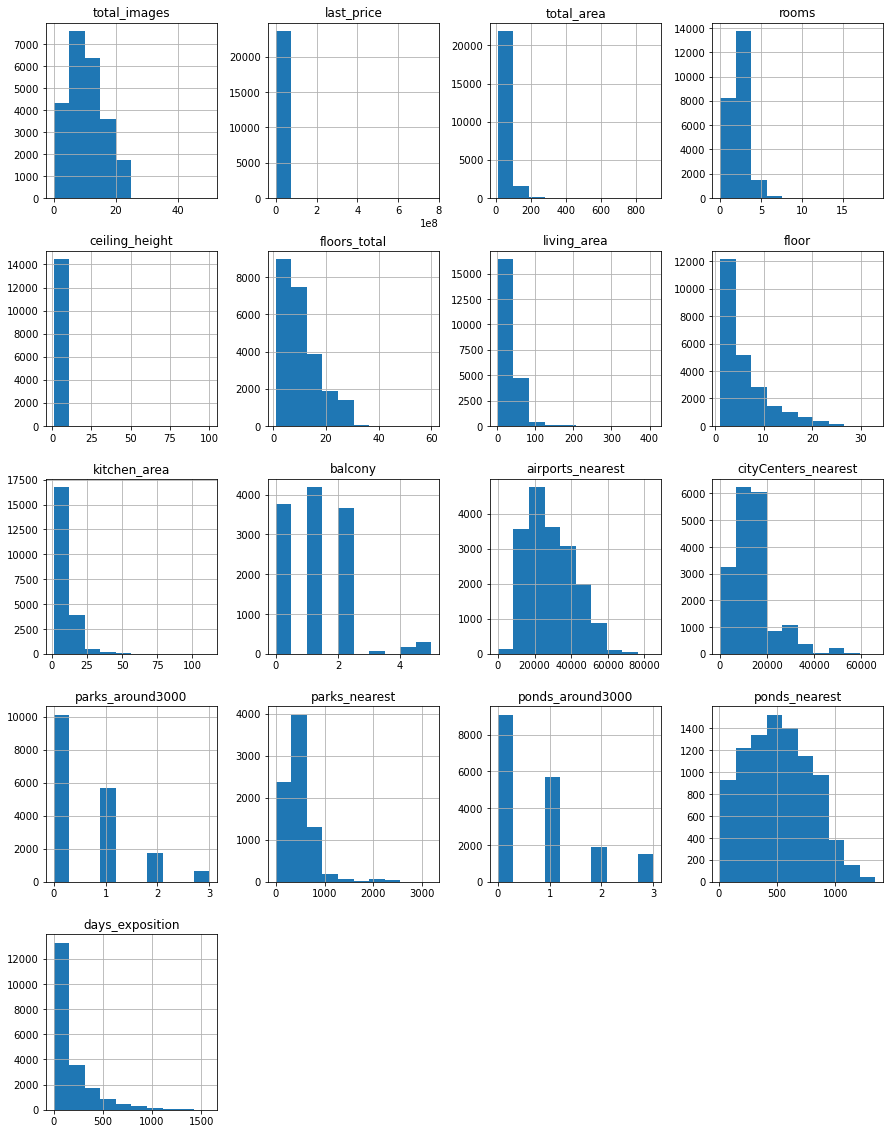

In [6]:
data.hist(figsize=(15,20))

**Вывод:**

***Всего файл содержит 23699 записи по объектам недвижимости, 22 столбца признаков (17 количественных, 4 категориальных и 1 временной). Для части столбцов видим наличие пропущенных значений***


### Предобработка данных

Выводим названия столбцов и проверяем все ли корректны, переименуем некорректные.

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest','ponds_around3000':'ponds_around_3000',
                      'parks_around3000':'parks_around_3000'})

In [9]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименованы 3 столбца -'cityCenters_nearest' в 'city_centers_nearest','ponds_around3000' в 'ponds_around_3000' и 
'parks_around3000' в 'parks_around_3000'.

**2.1  Пропущенные значения в столбцах**

Смотрим количество пропущенных значений датафрейм.

In [10]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим какую долю составляют выявленные пропуски.

In [11]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Выявлены пропущенные значения в столбцах датафрейма: ceiling_height - 9195 значений, floors_total - 86, living_area - 1903, is_apartment - 20924, kitchen_area - 2278, balcony - 11519, locality_name - 49, airports_nearest - 5542, city_centers_nearest -  5519, parks_around_3000 - 5518, parks_nearest - 15620, ponds_around_3000 - 5518, ponds_nearest - 14589, days_exposition - 3181.


**2.1.1  Рассмотрим пропуски в данных в столбце ceiling_height - высота потолков (м).**


In [12]:
data['ceiling_height'].isnull().sum()

9195

In [13]:
def nan_ratio (column):
    return  print('Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data),2) +  'значений')

In [14]:
nan_ratio('ceiling_height')

Пропущено 38.8%значений


In [15]:
ceiling_median=data.pivot_table(index='floors_total', values='ceiling_height',aggfunc=['median', 'count'])
ceiling_median.columns=['median','count']
ceiling_median.head()

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [16]:
for floor in ceiling_median.index:
    data.loc[(data['ceiling_height'].isna())&
          (data['floors_total']==floor),
          'ceiling_height']=ceiling_median.loc[floor, 'median']

Заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности домов и медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для домов соответствующей этажности.

In [17]:
for floor in ceiling_median.index:
    data.loc[(data['floors_total'].isna()) | ((data['floors_total']==floor) &
                                          (ceiling_median.loc[floor,'count']==0)),
          'ceiling_height']=data['ceiling_height'].describe()[5]
    

In [18]:
for floor in ceiling_median.index:
    data.loc[(data['ceiling_height'].isna())&
          (data['floors_total']==floor),
          'ceiling_height']=ceiling_median.loc[floor, 'median']

Проверяем на пропуски.

In [19]:
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

В данных столбца ceiling_height - высота потолков (м) было пропущено 9195 или 38.8% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или не посчитали данный параметр важным и обязательным для заполнения. Также мог иметь место технический сбой.

Пропущенные значения высоты потолков заполнены медианными значениями для домов соответствующей этажности.


**2.1.2  Рассмотрим пропуски в столбце Количество дней от публикации до снятия -days_exposition.**

In [20]:
data['days_exposition'].isnull().sum()

3181

In [21]:
nan_ratio('days_exposition')

Пропущено 13.4%значений


In [22]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В данных столбца days_exposition - количество дней от публикации до снятия было пропущено 3181 или 13.4% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или не посчитали данный параметр важным и обязательным для заполнения, могли просто проигнорировать и не тратить время на подсчет данного параметра. Также мог иметь место технический сбой.

Пропущенные значения количества дней от публикации до снятия на данном этапе исследования оставляем незаполненные, так как нет возможности заполнить их корректными данными.

In [23]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [24]:
first_day_exposition=data.pivot_table(index='first_day_exposition', values='days_exposition',
                                          aggfunc=['median','mean','count'])
first_day_exposition.columns=['median','mean', 'count']
first_day_exposition

,median,mean,count
first_day_exposition,,,
2014-11-27T00:00:00,1072.5,982.937500,16
2014-11-29T00:00:00,591.0,591.000000,1
2014-12-04T00:00:00,994.5,994.500000,2
2014-12-05T00:00:00,581.0,581.000000,1
2014-12-08T00:00:00,864.0,842.142857,7
...,...,...,...
2019-04-20T00:00:00,NaN,NaN,0
2019-04-27T00:00:00,NaN,NaN,0
2019-04-28T00:00:00,NaN,NaN,0


**2.1.3  Рассмотрим пропуски в столбце с числом балконов - balcony.**

In [25]:
data['balcony'].isnull().sum()

11519

In [26]:
nan_ratio('balcony')

Пропущено 48.6%значений


In [27]:
data['balcony']=data['balcony'].fillna('0')

In [28]:
data['balcony'].isna().value_counts()

False    23699
Name: balcony, dtype: int64

В данных столбца balcony - число балконов было пропущено 11519 или 48.6% значений. Можно предположить, что пропуски связаны отсутствием балконов в соответствующих квартирах.

Пропущенные значения числа балконов были заполнены "0".

**2.1.4  Рассмотрим пропуски в столбце аппартаменты - is_apartment.**

In [29]:
data['is_apartment'].isnull().sum()

20924

In [30]:
nan_ratio('is_apartment')

Пропущено 88.3%значений


In [31]:
data['is_apartment']=data['is_apartment'].fillna('False')

In [32]:
data['is_apartment'].isna().value_counts()

False    23699
Name: is_apartment, dtype: int64

В данных столбца is_apartment - апартаменты (булево значение) было пропущено 20924 или 88.3% значений. Можно предположить, что пропуски связаны с тем, что заполнены только те значения, где рассматриваемые объекты являются аппартаментами, остальные значения пропущены.

Пропущенные значения апартаментов были заполнены "False".

**2.1.5  Рассмотрим пропуски в столбце по числу парков в радиусе 3 км - parks_aroud_3000.**

In [33]:
data['parks_around_3000'].isnull().sum()

5518

In [34]:
nan_ratio('parks_around_3000')

Пропущено 23.3%значений


In [35]:
data['parks_around_3000']=data['parks_around_3000'].fillna('0')

In [36]:
data['parks_around_3000'].isna().value_counts()

False    23699
Name: parks_around_3000, dtype: int64

В данных столбца по числу парков в радиусе 3 км - parks_aroud_3000 было пропущено 5518 или 23.3% значений. Можно предположить, что пропуски связаны отсутствием парков в радиусе 3 км от рассматриваемых объектов.

Пропущенные значения числа парков в радиусе 3 км были заполнены "0".

**2.1.6  Рассмотрим пропуски в столбце по числу водоемов в радиусе 3 км - ponds_around_3000.**

In [37]:
data['ponds_around_3000'].isnull().sum()

5518

In [38]:
nan_ratio('ponds_around_3000')

Пропущено 23.3%значений


In [39]:
data['ponds_around_3000']=data['ponds_around_3000'].fillna('0')

In [40]:
data['ponds_around_3000'].isna().value_counts()

False    23699
Name: ponds_around_3000, dtype: int64

В данных столбца по числу водоемов в радиусе 3 км - ponds_around_3000 было пропущено 5518 или 23.3% значений. Можно предположить, что пропуски связаны отсутствием водоемов в радиусе 3 км от рассматриваемых объектов.

Пропущенные значения числа водоемов в радиусе 3 км были заполнены "0".

**2.1.7  Рассмотрим пропуски в столбце расстояний до ближайшего водоема - ponds_nearest.**

In [41]:
data['ponds_nearest'].isnull().sum()

14589

In [42]:
nan_ratio('ponds_nearest')

Пропущено 61.6%значений


In [43]:
data['ponds_nearest']=data['ponds_nearest'].fillna('unknown')

In [44]:
data['ponds_nearest'].isna().value_counts()

False    23699
Name: ponds_nearest, dtype: int64

В данных в столбце расстояний до ближайшего водоема - ponds_nearest было пропущено 14589 или 61.6% значений. Можно предположить, что пропуски связаны отсутствием водоемов в радиусе 3 км от рассматриваемых объектов, а также могли посчитать данный параметр неважным для заполнения -человеческий фактор.

Пропущенные значения расстояний до ближайшего водоема были заполнены значением "unknown".

**2.1.8  Рассмотрим пропуски в столбце расстояний до ближайшего парка - parks_nearest.**

In [45]:
data['parks_nearest'].isnull().sum()

15620

In [46]:
nan_ratio('parks_nearest')

Пропущено 65.9%значений


В данных в столбце расстояний до ближайшего парка - parks_nearest было пропущено 15620 или 65.9% значений. Можно предположить, что пропуски связаны отсутствием парков в радиусе 3 км от рассматриваемых объектов, а также могли посчитать данный параметр неважным для заполнения, даже в тех случаях, когда значение столбца с наличием ближайшего парка в радиусе 3 км заполнено -человеческий фактор.

Пропущенные значения расстояний до ближайшего парка были оставлены незаполненными, так как нет возможности заполнить корректным значением.

**2.1.9  Рассмотрим пропуски в столбце расстояний до центра города - city_centers_nearest.**

In [47]:
data['city_centers_nearest'].isnull().sum()

5519

In [48]:
nan_ratio('city_centers_nearest')

Пропущено 23.3%значений


В данных в столбце расстояний до центра города - city_centers_nearest было пропущено 5519 или 23.3% значений. Можно предположить, что значения расстояний до центра города, заполнены для объектов, находящихся на относительно небольшом удалении от центра города или непосредственно в центре города, и могут оказать влияние на цену объекта. Для тех объектов, для которых данный параметр пропущен, можно предположить, что объект находится на значительном удалении от центра города и посчитали его неважным и необзятельным для заполнения - человеческий фактор.

Пропущенные значения расстояний до центра города были оставлены незаполненными, так как нет возможности заполнить корректным значением.

**2.1.10  Рассмотрим пропуски в столбце расстояний до ближайшего аэропорта в метрах - airports_nearest.**

In [49]:
data['airports_nearest'].isnull().sum()

5542

In [50]:
nan_ratio('airports_nearest')

Пропущено 23.4%значений


В данных в столбце расстояний до ближайшего аэропорта в метрах - airports_nearest было пропущено 5542 или 23.4% значений. Можно предположить, что значения расстояний до ближайшего аэропорта, заполнены для объектов, находящихся на относительно небольшом расстоянии от аэропорта, и могут оказать влияние на цену объекта. Для тех объектов, для которых данный параметр пропущен, можно предположить, что объект находится на значительном удалении от ближайшего аэропорта и посчитали его неважным и необзятельным для заполнения - человеческий фактор. 

Пропущенные значения расстояний до ближайшего аэропорта были оставлены незаполненными, так как нет возможности заполнить их корректными значениями.

**2.1.11  Рассмотрим пропуски в столбце этажности дома - floors_total.**

In [51]:
data['floors_total'].isnull().sum()

86

In [52]:
nan_ratio('floors_total')

Пропущено 0.4%значений


In [53]:
data.dropna(subset=['floors_total'], inplace=True)

In [54]:
data['floors_total'].isna().value_counts()

False    23613
Name: floors_total, dtype: int64

В данных столбца floors_total - этажность дома было пропущено 86 или 0.4% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или не посчитали данный параметр важным и обязательным для заполнения. Также мог иметь место технический сбой.

Пропущенные значения этажности дома были удалены, так как они составляют 0.4% и их удаление существенно не повлияет на данейший анализ.

**2.1.12  Рассмотрим пропуски в столбце значений жилой площади в квадратных метрах - living_area.**

In [55]:
data['living_area'].isnull().sum()

1870

In [56]:
nan_ratio('living_area')

Пропущено 7.9%значений


In [57]:
living_area_mean=((data['living_area'].describe()[1]/data['total_area']).mean())*data['total_area']

In [58]:
data['living_area']=data['living_area'].fillna(living_area_mean)

In [59]:
data['living_area'].isna().value_counts()

False    23613
Name: living_area, dtype: int64

В данных столбца living_area - значений жилой площади в квадратных метрах было пропущено 1903 или 8.0% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или мог иметь место технический сбой.

Пропущенные значения жилой площади в квадратных метрах были заполнены на основании предположения, что если известна общая площадь объекта, то можно оценить соотношение жилой площади и общей площади по заполненным пользователями данным и вставить рассчетные данные на место пропущенных.

**2.1.13  Рассмотрим пропуски в столбце значений площади кухни в квадратных метрах - kitchen_area.**

In [60]:
data['kitchen_area'].isnull().sum()

2231

In [61]:
nan_ratio('kitchen_area')

Пропущено 9.4%значений


Заполняем пропущенные значения для квартир-студий значением "0".

In [62]:
data.loc[data['studio']==True,'kitchen_area']=0

Создадим таблицу, чтобы получить количество объектов, среднее и медианное значение площади кухни в зависимости от количества комнат объекта.

In [63]:
kitchen_median=data.pivot_table(index='rooms', values='kitchen_area',aggfunc=['median','mean','count'])
kitchen_median.columns=['median','mean', 'count']
kitchen_median.head(10)

,median,mean,count
rooms,,,
0,0.00,0.000000,135
1,9.00,9.534132,7214
2,8.70,9.974912,7270
3,9.50,11.293906,5369
4,11.05,13.663009,1080
5,15.10,18.367649,285
6,19.75,21.098229,96
7,20.00,21.998077,52
8,25.00,24.866667,9


Заполняем оставшиеся незаполненные значения медианными значениями для объектов с соответсвующим числом комнат.

In [64]:
for room in kitchen_median.index:
    data.loc[(data['kitchen_area'].isna())&
          (data['rooms']==room),
          'kitchen_area']=kitchen_median.loc[room,'median']

In [65]:
for room in kitchen_median.index:
    data.loc[(data['kitchen_area'].isna()) | ((data['rooms']==room) &
                                          (kitchen_median.loc[room,'count']==0)),
          'kitchen_area']=data['kitchen_area'].describe()[5]

In [66]:
for room in kitchen_median.index:
    data.loc[(data['kitchen_area'].isna())&
          (data['rooms']==room),
           'kitchen_area']=kitchen_median.loc[room, 'median']
           

In [67]:
data['kitchen_area'].isna().value_counts()

False    23613
Name: kitchen_area, dtype: int64

В данных столбца значений площади кухни в квадратных метрах - kitchen_area было пропущено 2278 или 9.6% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности мог иметь место технический сбой.

Пропущенные значения площади кухни в квадратных метрах были заполнены значением "0" для объектов квартира-студия (138), оставшиеся незаполненные значения - медианными значениями для объектов с соответсвующим числом комнат.

**2.1.14  Рассмотрим пропуски в столбце с названием населенного пункта -locality_name.**

In [68]:
data['locality_name'].isnull().sum()

48

In [69]:
nan_ratio('locality_name')

Пропущено 0.2%значений


In [70]:
data.dropna(subset=['locality_name'], inplace=True)

В данных столбца с названием населенного пункта - locality_name было пропущено 49 или 0.2% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или мог иметь место технический сбой.

Пропущенные значения с названием населенного пункта были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.2%, их удаление не приведет к искажению результатов исследования.

Проверяем оставшееся количество незаполненных значений после обработки данных.

In [71]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest               0
days_exposition          3171
dtype: int64

Остались незаполненные значения параметров расстояние до ближайшего аэропорта в метрах- airport_nearest, расстояние до центра города- city_centers_nearest и расстояние до ближайшего парка- parks_nearest. Эти пропуски оставили незаполненными, так как скорее всего они говорят о большой удаленности объектов недвижимости от указанных объектов. 

**2.2  Типы данных в столбцах**

Приводим к типу даты дату публикации 'first_day_exposition'.

In [72]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

Приводим в целочисленный тип  количество балконов -'balcony', количество этажей в доме - 'floors_total'.

In [73]:
data['balcony']=data['balcony'].astype(int)

In [74]:
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23565, dtype: int32

In [75]:
data['floors_total']=data['floors_total'].astype(int)

In [76]:
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23565, dtype: int32

Методом datetime() превращаем в понятные для Python даты из типа object в тип datetime в столбце first_day_exposition -дата публикации.

В столбце balcony -число балконов и floors_total - всего этажей в доме заменяем тип float на int. 

**2.3  Уникальные значения в столбце с названиями и неявные дубликаты**

Проверяем данные на наличие явных дубликатов.

In [77]:
data.duplicated().sum()

0

Посмотрим все значения, которые встречаются в столбце locality_name -название населенного пункта.

In [78]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [79]:
len(data['locality_name'].unique())

364

Уникальных значений в столбце locality_name -название населенного пункта встречается 364. В то же время видим, что в столбце имеются неявные дубликаты - встречаются названия, где в одном и том же названии есть слово "посёлок" и "поселок".

Заменим методом replace() выявленные неявные дубликаты.

In [80]:
data['locality_name']=[_.replace('посе','посё') for _ in data['locality_name']]

Проверяем.

In [81]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

In [82]:
len(data['locality_name'].unique())

330

В результате обработки неявных дубликатов в столбце locality_name -название населенного пункта, количество уникальных значений в данном столбце стало 330 (до обработки - 364).

**2.4  Редкие и выбивающиеся значения**

Рассмотрим значения столбца ceiling_height - высота потолков (м).

In [83]:
data['ceiling_height'].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В столбце встречаются значения более 20 м. Можно предположить, что это вещественные значения, напраимер, для 20 - 2.0 м.
Приведем их к нормальному значению.

In [84]:
data.loc[data['ceiling_height']>=20,'ceiling_height']=data['ceiling_height']/10

Выведем срез, где выпота потолка ceiling_height больше 6 м и менее 2 м.

In [85]:
data[(data.ceiling_height>6)|(data.ceiling_height<2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,14.85,36,21.4,28,False,...,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,7.30,0,деревня Нурма,NaN,NaN,0,NaN,0,unknown,125.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,0,unknown,248.0
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,8.30,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11,2,14.00,14,32.4,5,False,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,unknown,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.00,16,41.0,1,False,...,8.00,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,unknown,474.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17442,0,5350000.0,54.0,2015-06-16,2,8.00,5,29.0,2,False,...,8.70,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,unknown,469.0
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16,15.5,15,False,...,9.00,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Удалим аномальные значения.

In [86]:
data.drop(data.index[data['ceiling_height']>6],inplace=True)
data.drop(data.index[data['ceiling_height']<2],inplace=True)

Проверяем.

In [87]:
data[(data.ceiling_height>6)|(data.ceiling_height<2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Выведем срез общей площади квартиры -total_area, где общая площадь больше 500 кв.м. и меньше 12 кв.м.

In [88]:
data[(data.total_area>500)|(data.total_area<12)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30,7,2.55,5,434.491334,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14,7,3.00,4,332.000000,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.000000,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,unknown,14.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.500000,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,unknown,1078.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.300000,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.000000,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.700000,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Удаляем выбивающиеся значения.

In [89]:
data.drop(data.index[data['total_area']>500],inplace=True)

Проверим на наличие выбивающихся значений.

In [90]:
data[(data.total_area>500)|(data.total_area<12)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Выводим уникальные значения столбца rooms -число комнат. Удаляем выбивающиеся значения и проверяем.

In [91]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9, 19, 16],
      dtype=int64)

Смотрим распределение по данному параметру.

In [92]:
data.groupby('rooms')['rooms'].count()

rooms
0      194
1     7999
2     7892
3     5778
4     1172
5      324
6      104
7       55
8       12
9        8
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

In [93]:
data[(data.rooms>15)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,2.55,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,unknown,1365.0


In [94]:
data.drop(data.index[data['rooms']>15],inplace=True)

In [95]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9], dtype=int64)

Удалены выбивающиеся значения, где число комнат больше 15, это значения 16 и 19 комнат - они встречаются в выборке по одному разу, нельзя с уверенностью сказать нормальные это значения или ошибочные. Число комнат 10, 11 и 14 встречаются в выборке 3, 2 и 2 раза соответственно, их оставляем.

Выводим срез столбца last_price -цена на момент снятия публикации, где цена больше 500000000 и меньше 300000.

In [96]:
data[(data.last_price>500000000)|(data.last_price<300000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,unknown,8.0
12971,19,763000000.0,400.0,2017-09-30,7,2.60,10,250.0,10,False,...,20.0,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Удаляем выбивающиеся значения и проверяем результат.

In [97]:
data.drop(data.index[data['last_price']>500000000],inplace=True)
data.drop(data.index[data['last_price']<300000],inplace=True)


In [98]:
data[(data.last_price>500000000)|(data.last_price<300000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Выводим срез столбца living_area -жилая площадь, где жилая площадь меньше 6.5 кв.м.

In [99]:
data[(data.living_area<6.5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.70,17,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,unknown,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,False,...,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,unknown,168.0
17582,11,2680000.0,22.0,2018-08-11,0,2.75,25,5.0,8,False,...,0.0,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,2.75,24,2.0,22,False,...,0.0,0,посёлок Мурино,NaN,NaN,0,NaN,0,unknown,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,unknown,33.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Удаляем выбивающиеся значения и проверяем результат.

In [100]:
data.drop(data.index[data['living_area']<6.5],inplace=True)

In [101]:
data[(data.living_area<6.5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


****Выводы:****

**1.Высота потолков:**
*В данных столбца ceiling_height - высота потолков (м) было пропущено 9195 или 38.8% значений. Пропущенные значения высоты потолков заполнены медианными значениями для домов соответствующей этажности.В части данных были обнаружены ошибки заполнения (20 м вместо 2.0 м и др.), они заменены на корректные данные. Удалены выбивающиеся данные для случаев, где значения были более 5 м и менее 2 м.*

**2.Количество дней до публикации:**
*В данных столбца days_exposition - количество дней от публикации до снятия было пропущено 3181 или 13.4% значений. 
Пропущенные значения количества дней не заполнены, так как нет возможности их заполнить корректными значениями.*

**3.Число балконов:**
*В данных столбца balcony - число балконов было пропущено 11519 или 48.6% значений. Можно предположить, что пропуски связаны отсутствием балконов в соответствующих квартирах. Пропущенные значения числа балконов были заполнены "0".*

**4.Апартаменты:**
*В данных столбца is_apartment - апартаменты (булево значение) было пропущено 20924 или 88.3% значений. Можно предположить, что пропуски связаны с тем, что заполнены только те значения, где рассматриваемые объекты являются аппартаментами, остальные значения пропущены. Пропущенные значения апартаментов были заполнены "False".*

**5.Число парков в радиусе 3 км:**
*В данных столбца по числу парков в радиусе 3 км - parks_aroud_3000 было пропущено 5518 или 23.3% значений. Можно предположить, что пропуски связаны отсутствием парков в радиусе 3 км от рассматриваемых объектов. Пропущенные значения числа парков в радиусе 3 км были заполнены "0".*

**6.Число водоемов в радиусе 3 км:**
*В данных столбца по числу водоемов в радиусе 3 км - ponds_around_3000 было пропущено 5518 или 23.3% значений. Можно предположить, что пропуски связаны отсутствием водоемов в радиусе 3 км от рассматриваемых объектов. Пропущенные значения числа водоемов в радиусе 3 км были заполнены "0".*

**7.Расстояние до ближайшего водоема:**
*В данных в столбце расстояний до ближайшего водоема - ponds_nearest было пропущено 14589 или 61.6% значений. Можно предположить, что пропуски связаны отсутствием водоемов в радиусе 3 км от рассматриваемых объектов, а также могли посчитать данный параметр неважным для заполнения -человеческий фактор. Пропущенные значения расстояний до ближайшего водоема были заполнены значением "unknown".*

**8.Расстояние до ближайшего парка:**
*В данных в столбце расстояний до ближайшего парка - parks_nearest было пропущено 15620 или 65.9% значений. Можно предположить, что пропуски связаны отсутствием парков в радиусе 3 км от рассматриваемых объектов. Пропущенные значения расстояний до ближайшего парка были оставлены незаполненными, так как нет возможности заполнить корректным значением.*

**9.Расстояние до центра города:**
*В данных в столбце расстояний до центра города - city_centers_nearest было пропущено 5519 или 23.3% значений. Можно предположить, что значения расстояний до центра города, заполнены для объектов, находящихся на относительно небольшом удалении от центра города или непосредственно в центре города, и могут оказать влияние на цену объекта. Для тех объектов, для которых данный параметр пропущен, можно предположить, что объект находится на значительном удалении от центра города и посчитали его неважным и необзятельным для заполнения - человеческий фактор. Пропущенные значения расстояний до центра города были оставлены незаполненными, так как нет возможности заполнить корректным значением.*

**10.Расстояние до ближайшего аэропорта:**
*В данных в столбце расстояний до ближайшего аэропорта в метрах - airports_nearest было пропущено 5542 или 23.4% значений. Можно предположить, что значения расстояний до ближайшего аэропорта, заполнены для объектов, находящихся на относительно небольшом расстоянии от аэропорта, и могут оказать влияние на цену объекта. Для тех объектов, для которых данный параметр пропущен, можно предположить, что объект находится на значительном удалении от ближайшего аэропорта и посчитали его неважным и необзятельным для заполнения - человеческий фактор. Пропущенные значения расстояний до ближайшего аэропорта были оставлены незаполненными, так как нет возможности заполнить их корректными значениями.*

**11.Этажность:**
*В данных столбца floors_total - этажность дома было пропущено 86 или 0.4% значений.Пропущенные значения этажности дома были заполнены медианными значениями данного параметра.*

**12.Жилая площадь:**
*В данных столбца living_area - значений жилой площади в квадратных метрах было пропущено 1903 или 8.0% значений. Пропущенные значения жилой площади в квадратных метрах были заполнены на основании предположения, что если известна общая площадь объекта, то можно оценить соотношение жилой площади и общей площади по заполненным пользователями данным и вставить рассчетные данные на место пропущенных. Удалены выбивающиеся значения жилой площади менее 6.5 м.*

**13.Площадь кухни:**
*В данных столбца значений площади кухни в квадратных метрах - kitchen_area было пропущено 2278 или 9.6% значений. Пропущенные значения площади кухни в квадратных метрах были заполнены значением "0" для объектов квартира-студия (138), оставшиеся незаполненные значения - медианными значениями для объектов с соответсвующим числом комнат.*

**14.Название населенного пункта:**
*В данных столбца с названием населенного пункта - locality_name было пропущено 49 или 0.2% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или мог иметь место технический сбой. Пропущенные значения с названием населенного пункта были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.2%, их удаление не приведет к искажению результатов исследования.Уникальных значений в столбце встречается 364. В то же время видим, что имеются неявные дубликаты - встречаются названия, где в одном и том же названии есть слово "посёлок" и "поселок". После обработки количество уникальных значений в данном столбце стало 330 (до обработки - 364).*

**15.Число комнат:**
*Удалены выбивающиеся значения более 15 комнат.*

**16.Цена на момент снятия с публикации:**
*Удалены выбивающиеся значения, где цена больше 500000000 и меньше 300000.Заменен тип float на int. В виде целого числа значения визуально лучше для восприятия.*

**17.Дата публикации:**
*Методом datetime() превращаем в понятные для Python даты из типа object в тип datetime.*Выведем срез общей площади квартиры -total_area, где общая площадь больше 500 кв.м. и меньше 12 кв.м.

**18.Общая площадь:**
*Удалены выбивающиеся значения общей площади квартиры, где общая площадь больше 500 кв.м. и меньше 15 кв.м.*

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем цену одного квадратного метра и добавим в датафрейм.

In [102]:
data['price_per_m']=round(data['last_price']/data['total_area'],1)

Добавляем столбецы с днем недели, месяцем и годом публикации объявления.

In [103]:
data['weekday']=data['first_day_exposition'].dt.weekday

In [104]:
weekday_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [105]:
data['weekday']=data['weekday'].map(weekday_dict)

In [106]:
data['month']=data['first_day_exposition'].dt.month

In [107]:
month_dict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 
            10:'October', 11:'November', 12:'December'}

In [108]:
data['month']=data['month'].map(month_dict)

In [109]:
data['year']=data['first_day_exposition'].dt.year

Возвращается к параметру количество дней с момента публикации до снятия. Значения столбца теперь приведены к типу даты. Есть возможноть рассмотреть данный параметр по году публикации.

In [110]:
year_exposition=data.pivot_table(index='year', values='days_exposition',
                                          aggfunc=['median','mean','count'])
year_exposition.columns=['median','mean', 'count']
year_exposition

,median,mean,count
year,,,
2014,876.0,911.338983,118
2015,580.5,651.066850,1092
2016,238.0,323.125887,2677
2017,103.0,159.182925,7883
2018,63.0,94.253525,7518
2019,23.0,30.966667,1080


<AxesSubplot:xlabel='year'>

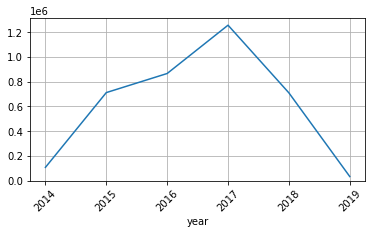

In [111]:
data.groupby(['year'])['days_exposition'].sum().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Количество дней с момента публикации до снятия к концу 2019 года стремится к "0". Это говорит о том, что скорее всего данные объявления еще не закрыты и находятся в работе, поэтому там не проставлено количество дней с момента публикации до снятия. Оставляем пропуски в данном столбце незаполненными.

Добавляем столбец с типом этажа квартиры -"первый", "последний", "другой".

In [112]:
data.loc[data['floor']==1, 'floor_category']='первый'
data.loc[data['floor']==data['floors_total'], 'floor_category']='последний'
data.loc[data['floor_category'].isna(), 'floor_category']='другой'

Переведем расстояние до центра города из метров в километры.

In [113]:
data['city_centers_nearest_km']=round(data['city_centers_nearest']/1000, 0)
data['city_centers_nearest_km']=data['city_centers_nearest_km'].astype('float64',errors='ignore')

In [114]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.4,Thursday,March,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,NaN,0.0,unknown,81.0,82920.8,Tuesday,December,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.7,Thursday,August,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,109.483553,9,False,...,84.0,3.0,234.0,424.0,408176.1,Friday,July,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.0,Tuesday,June,2018,другой,8.0


****Выводы:****

**Посчитаны и добавлены в датафрейм новые столбцы со следующими параметрами:**

*- цена одного квадратного метра;*

*- день недели публикации объявления (0-понедельник, 1-вторник, 2-среда, 3-четверг, 4-пятница, 5-суббота, 6-воскресенье;*

*-месяц публикации объявления;*

*-год публикации объявления;*

*-тип этажа квартиры (значения - "первый", "последний", "другой");*

*-расстояние до центра города в километрах, переведенное из м в км и округленное до целых значений.*

### Проведите исследовательский анализ данных

**4.1  Изучаем параметры объектов**

**4.1.1 Изучим параметр общая площадь.**

Создаем функцию, которая определит границы "усов" при построении диаграммы "размаха" для каждого задаваемого признака, где:
igr - межквартильный размах,
left_whisker и right_whisker - левый и правый "ус",
при этом правый "ус" не должен быть больше максимального значения, а левый - не должен быть меньше минимального значения.

In [115]:
def det_whiskers(column):
    stat=data[column].describe()
    iqr=stat[6]-stat[4]
    left_whisker=round(stat[4]-1.5*iqr,2)
    right_whisker=round(stat[6]+1.5*iqr,2)
    if left_whisker < stat[3]:
        left_whisker=stat[3]
    if right_whisker > stat[7]:
        right_whisker=stat[7]
    return [left_whisker],[right_whisker]

In [116]:
data['floors_total'].describe()

count    23536.000000
mean        10.673734
std          6.590030
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [117]:
det_whiskers('total_area')

([12.0], [114.25])

Выведем описание значений столбца.

In [118]:
data['total_area'].describe()

count    23536.000000
mean        60.123205
std         34.075867
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        500.000000
Name: total_area, dtype: float64

Построим гистограмму для квартир с общей площадью менее 120 кв.м.

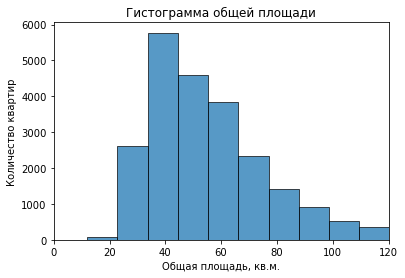

In [119]:
sns.histplot(data['total_area'], kde=False, bins=45)
plt.xlim(0,120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир площадью до 80 кв.м. При площади более 80 кв.м., количество квартир уменьшается с увеличением общей площади. В выборке встречаются единичные квартиры очень большой площади более 200 кв.м. Также есть единичные квартиры мальй площади менее 20 кв.м.

**4.1.2 Изучаем параметр жилая площадь.**

In [120]:
det_whiskers('living_area')

([6.5], [78.75])

Выведем описание значений столбца.

In [121]:
data['living_area'].describe()

count    23536.000000
mean        35.076294
std         22.239077
min          6.500000
25%         19.000000
50%         30.330000
75%         42.900000
max        347.500000
Name: living_area, dtype: float64

Построим гистограмму жилой площади.

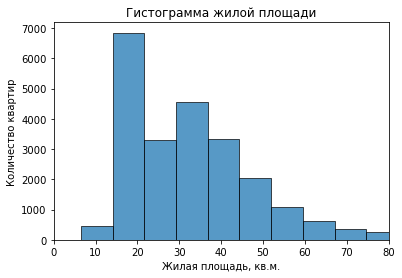

In [122]:
sns.histplot(data['living_area'], kde=False, bins=45)
plt.xlim(0,80)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

Самые распространенные варианты с жилой площадью от 10 до 50 кв.м. После 80 кв.м. встречаются единичные значения. 

**4.1.2.1 Рассмотрим зависимость жилой площади от общей площади.**

Построим график зависимости жилой площади от общей площади недвижимости.

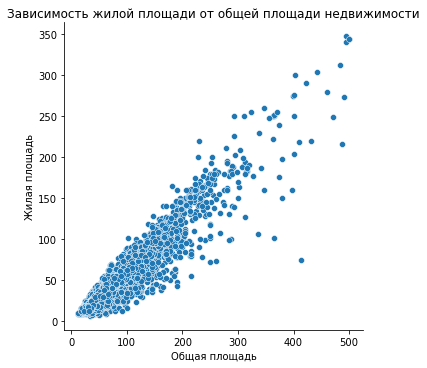

In [123]:
sns.relplot(x='total_area', y='living_area', data=data)
total_area=np.linspace(0,800)
plt.title('Зависимость жилой площади от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.show()

На графике прослеживается зависимость увеличения жилой площади объектов при увеличении общей площади.

Выведем зависимость жилой площади от общей площади квартиры в преломлении к количеству комнат в квартире.

In [124]:
data['living_area_ratio']=round(data['living_area']/data['total_area'],3)
living_area_ratio=data.pivot_table(index='rooms', values='living_area_ratio',
                                          aggfunc=['mean'])
living_area_ratio.columns=['mean']
living_area_ratio.head(10)

,mean
rooms,
0,0.691193
1,0.502569
2,0.588425
3,0.630462
4,0.650595
5,0.646373
6,0.671173
7,0.668926
8,0.667000


Соотношение жилой площади к общей площади квартиры прослеживается примерно на одном уровне. Чем больше общая площадь квартиры, тем больше количество комнат в квартире и больше жилая площадь.

**4.1.3 Изучаем параметр площадь кухни**

In [125]:
det_whiskers('kitchen_area')

([0.75], [17.95])

Выведем описание значений столбца.

In [126]:
data['kitchen_area'].describe()

count    23536.000000
mean        10.347485
std          5.625825
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

Построим гистограмму площади кухни.

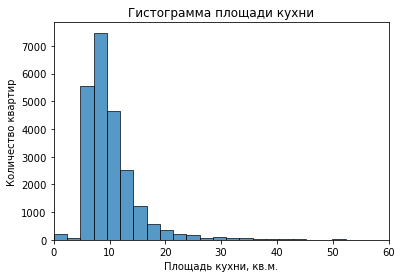

In [127]:
sns.histplot(data['kitchen_area'], kde=False, bins=45)
plt.xlim(0,60)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

Самые распространенные варианты - с площадью кухни от 5 до 15 кв.м. Квартир с кухнями площадью более 20 кв.м. очень мало, более 30 кв.м. - практически не встречаются.

**4.1.3.1 Рассмотрим зависимость площади кухни от общей площади.**

Построим график зависимости площади кухни от общей площади недвижимости.

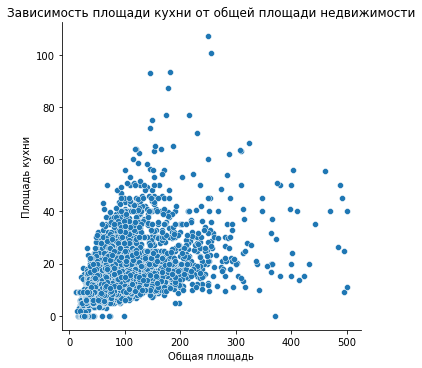

In [128]:
sns.relplot(x='total_area', y='kitchen_area', data=data)
total_area=np.linspace(0,300)
plt.title('Зависимость площади кухни от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Площадь кухни')
plt.show()

На графике прослеживается зависимость увеличения площади кухни в квартире при увеличении общей площади.


Посмотрим зависимость площади кухни от общей площади квартиры в преломлении к количеству комнат в квартире.

In [129]:
data['kitchen_area_ratio']=round(data['kitchen_area']/data['total_area'],3)
kitchen_area_ratio=data.pivot_table(index='rooms', values='kitchen_area_ratio',
                                    
                                          aggfunc=['mean'])
kitchen_area_ratio.columns=['mean']
kitchen_area_ratio.head(10)

,mean
rooms,
0,0.000000
1,0.251533
2,0.173199
3,0.140154
4,0.123684
5,0.113843
6,0.105154
7,0.093278
8,0.093000


Доля площади кухни к общей площади квартиры уменьшается с увеличением количества комнат в квартире.

**4.1.4 Изучаем параметр цена на момент снятия с публикации**

Чтобы визуально проще было изучать данный параметр, переведем цену в млн.руб. и рассмотрим описание значений данного столбца.

In [130]:
data['last_price_mln']=round(data['last_price']/1000000,3)

In [131]:
det_whiskers('last_price_mln')

([0.43], [11.88])

In [132]:
data['last_price_mln'].describe()

count    23536.000000
mean         6.455708
std          9.041790
min          0.430000
25%          3.400000
50%          4.633500
75%          6.790000
max        401.300000
Name: last_price_mln, dtype: float64

Построим гистограмму цены на момент снятия с публикации.

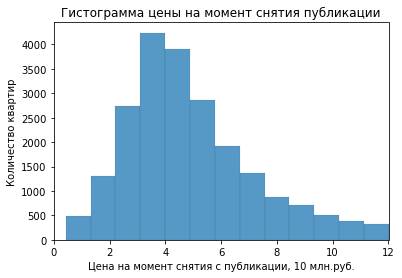

In [133]:
sns.histplot(data['last_price_mln'], kde=False, bins=450)
plt.xlim(0,12)
plt.title('Гистограмма цены на момент снятия публикации')
plt.xlabel('Цена на момент снятия с публикации, 10 млн.руб.')
plt.ylabel('Количество квартир')
plt.show()

Самое большое количество квартир продано в ценовом сегменте от 3 до 4 млн.руб. Основная ценовая категория - от 2 до 6 млн. Чем дороже квартира, тем меньшее количество продаж. Есть небольшое количество квартир в недорогом сегменте - до 1 млн.руб.

Text(0.5, 0, 'Цена на момент снятия с публикации')

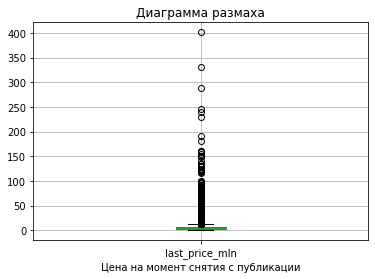

In [134]:
data.boxplot('last_price_mln')
plt.title('Диаграмма размаха')
plt.xlabel('Цена на момент снятия с публикации')

**4.1.5 Изучаем параметр количество комнат**

Выведем описание значений данного столбца.

In [135]:
det_whiskers('rooms')

([0.0], [6.0])

In [136]:
data['rooms'].describe()

count    23536.000000
mean         2.067556
std          1.061415
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

Построим гисторамму.

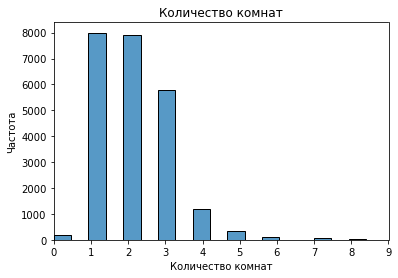

In [137]:
sns.histplot(data['rooms'], kde=False, bins=30)
plt.xlim(0,9)
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир - одно- и двухкомнатные, немного меньше - трехкомнатных квартир. Небольшое количество квартир-студий и квартир с большим количеством комнат.

**4.1.6 Изучаем параметр высота потолков**

Выведем описание значений данного столбца.

In [138]:
det_whiskers('ceiling_height')

([2.25], [3.05])

In [139]:
data['ceiling_height'].describe()

count    23536.000000
mean         2.707378
std          0.234677
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

Построим гистограмму.

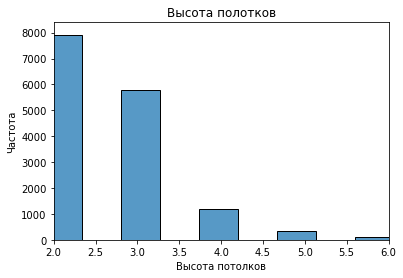

In [140]:
sns.histplot(data['rooms'], kde=False, bins=30)
plt.xlim(2,6)
plt.title('Высота полотков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир - с высотой потолков 2-2.35 м. Большое количество квартир и с более высокими потолками 2.8-3.3 м. С еще более высокими потолками - единичные квартиры.

**4.1.7 Изучаем параметр этаж квартиры**

Выведем описание значений данного параметра.

In [141]:
det_whiskers('floor')

([1.0], [17.0])

In [142]:
data['floor'].describe()

count    23536.000000
mean         5.875297
std          4.865914
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Построим гистограмму.

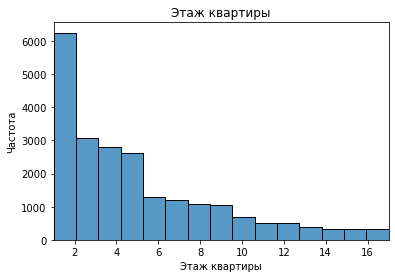

In [143]:
sns.histplot(data['floor'], kde=False, bins=30)
plt.xlim(1,17)
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир располагается на 1-4 этажах.


**4.1.8 Изучаем параметр тип этажа квартиры**

Типы этажа квартиры мы задали "первый", "последний" и "другой".

In [144]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [145]:
floor_category=data.pivot_table(index='floor_category', values='floor',
                                          aggfunc=['count'])
floor_category.columns=[ 'count']
floor_category.head()

,count
floor_category,
другой,17311
первый,2880
последний,3345


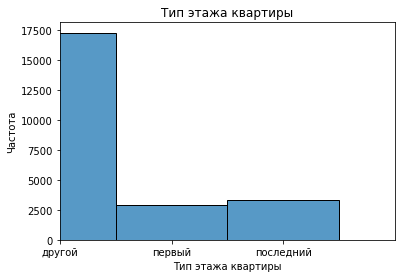

In [146]:
sns.histplot(data['floor_category'], kde=False, bins=30)
plt.xlim(0,3)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Частота')
plt.show()

Количество проданных квартир зависит от категории квартиры ("первый", "последний", "другой"). Наибольшее количество объектов недвижимости относятся к категории "другой", т.е. расположены не на крайних этажах. Наименьшее количество квартир расположено на первом и последнем этажах, на первом меньше, чем на последнем.

**4.1.9 Изучаем параметр расстояние до центра города**

Выводим описание данных данного параметра.

In [147]:
det_whiskers('city_centers_nearest')

([181.0], [26871.0])

In [148]:
data['city_centers_nearest'].describe()

count    18038.000000
mean     14199.348487
std       8614.691656
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Строим гисторамму.

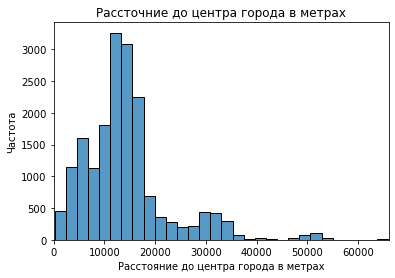

In [149]:
sns.histplot(data['city_centers_nearest'], kde=False, bins=30)
plt.xlim(0,66000)
plt.title('Рассточние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Частота')
plt.show()

Наибольший пик приходится на объекты недвижимости, находящиеся на относительно небольшом расстоянии от центра города, что близко к медианному значению данного параметра -13000 м (это скорее всего окраины города, где ведется активное строительство и цены демократичнее). Количество квартир снижается с увеличением отдаленности от центра города.

**4.1.10 Изучаем параметр расстояние до ближайшего аэропорта**

Выводим описание данных данного параметра.

In [150]:
det_whiskers('airports_nearest')

([0.0], [65384.5])

In [151]:
data['airports_nearest'].describe()

count    18016.000000
mean     28800.258159
std      12638.539647
min          0.000000
25%      18557.000000
50%      26757.000000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Строим гистограмму.

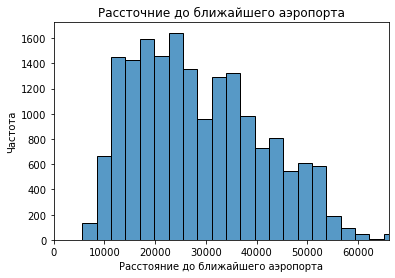

In [152]:
sns.histplot(data['airports_nearest'], kde=False, bins=30)
plt.xlim(0,66000)
plt.title('Рассточние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир расположены на расстоянии 20000-40000 м от ближайшего аэропорта. На расстоянии менее 10000 м от ближайшего аэропорта расположено небольшое количество квартир, на расстоянии более 50000 м - количество квартир резко снижается.

**4.1.11 Изучаем параметр расстояние до ближайшего парка**

Выводим описание данных данного параметра.

In [153]:
det_whiskers('parks_nearest')

([1.0], [1098.0])

In [154]:
data['parks_nearest'].describe()

count    8016.000000
mean      490.518713
std       341.754302
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Строим гистограмму.

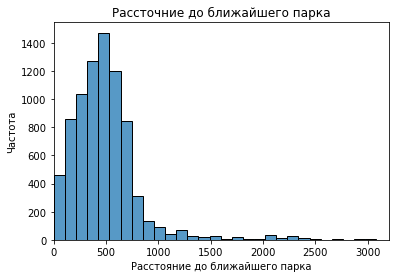

In [155]:
sns.histplot(data['parks_nearest'], kde=False, bins=30)
plt.xlim(0,3200)
plt.title('Рассточние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Частота')
plt.show()

Параметр расстояния от ближайшего парка заполнен 8050 значениями. Основной пик из этого количества приходится приходится на квартиры, расположенные на расстоянии до 1000 м от ближайшего парка, на расстоянии более 1000 м -единичные значения. Таким образом, подтверждается сделанное ранее предположение, что данные заполнены преимущественно для имеющих парки в непосредственной близости.

**4.1.12 Изучим параметры день и месяц публикации объявления**

Строим гистограмму для параметра день недели.

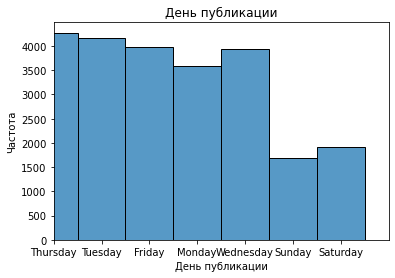

In [156]:
sns.histplot(data['weekday'], kde=False, bins=30)
plt.xlim(0,7)
plt.title('День публикации')
plt.xlabel('День публикации')
plt.ylabel('Частота')
plt.show()

На графике видно, что наибольшее число квартир приходится на будние дни недели, где число квартир, приходящееся на каждый  будний день сопоставимы. Небольшое снижение активности приходится на выходные дни - субботу и воскресенье.

Строим гистограмму для данного параметра.

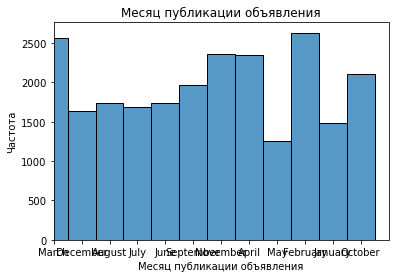

In [157]:
sns.histplot(data['month'], kde=False, bins=30)
plt.xlim(0,12)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Частота')
plt.show()

На гистограмме видим, что самые неактивные месяцы - май, январь и декабрь. Наибольшая активность приходится на февраль-апрель и ноябрь.

In [158]:
det_whiskers('year')

([2015.5], [2019.0])

In [159]:
data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

<AxesSubplot:>

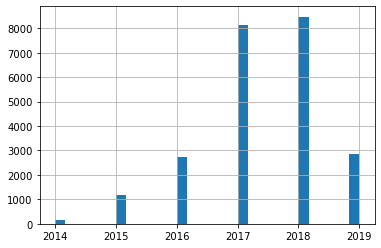

In [160]:
data['year'].hist(bins=30)

На диаграмме видим большие изменения количества продаж в зависимости от года публикации объявления. В 2015 - самые низкие продажи за весь рассматриваемый период. В 2014 году начался кризис, он возник внутри страны, но прошел более безболезненно, чем предыдущий кризис 2008 года. Данный кризис возможно было спрогназировать заранее и опытные организации смогли предпринять меры по уменьшению кредитной нагрузки и запуска новых проектов.В 2015 году было снижение ввода жилья из-за кризиса.В 2016 было небольшое увеличение ввода жилья, относительно 2015 года.В 2017-2018 г.г. наблюдается значительный рост за счет большого строительтва, введения льготный ипотечных условий и др. В 2019 г. рынок начал терять свою стабильность в ответ на изменения в законодательстве-покупатели взволнованы ожидаемым повышением стоимости жилья, застройщики оценивают риски банкротства. Это сразу отразилось на количестве продаж в 2019 году.

**4.1.13 Изучаем параметр общее количество этажей в доме.**

Выводим описание значений данного параметра.

In [161]:
det_whiskers('floors_total')

([1.0], [32.5])

In [162]:
data['floors_total'].describe()

count    23536.000000
mean        10.673734
std          6.590030
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Строим гистограмму для данного параметра.

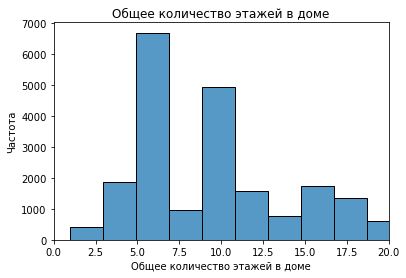

In [163]:
sns.histplot(data['floors_total'], kde=False, bins=30)
plt.xlim(0,20)
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Частота')
plt.show()

Наибольшее количество квартир приходится на 5-этажные дома, можно сделать предположение, что это квартиры массовой застройки 60-х -70-х годов. Также большое количество квартир - в 10-этажных домах.

**4.2. Изучаем как быстро продавались квартиры -параметр количества дней размещения объявления**

Выведем описание значений данного параметра.

In [164]:
det_whiskers('days_exposition')

([1.0], [510.0])

In [165]:
data['days_exposition'].describe()

count    20368.000000
mean       180.694815
std        219.572635
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Строим гистограмму для данного параметра.

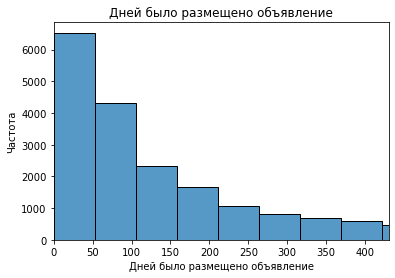

In [166]:
sns.histplot(data['days_exposition'], kde=False, bins=30)
plt.xlim(0,430)
plt.title('Дней было размещено объявление')
plt.xlabel('Дней было размещено объявление')
plt.ylabel('Частота')
plt.show()

Выводим средние и медианные значения для количества дней размещения объявления, здесь смотрим также зависимость от количества комнат в квартире.

In [167]:
days_exposition_mean=data.pivot_table(index='rooms', values='days_exposition',aggfunc=['median','mean','count'])
days_exposition_mean.columns=['median','mean', 'count']
days_exposition_mean.head(10)

,median,mean,count
rooms,,,
0,47.0,110.797753,178
1,81.0,158.814610,7228
2,91.0,172.998689,6864
3,114.0,204.120794,4785
4,155.5,253.971030,932
5,185.5,304.056000,250
6,201.5,277.789474,76
7,146.0,205.142857,35
8,249.0,391.090909,11


Посчитаем слишком быстрые продажи, необычайно долгие и обычное время, которое занимают продажи.

In [168]:
data['days_exposition_mean']=data['days_exposition'].describe()[1]
def days_exposition_category(row):
    days_exposition=row['days_exposition']
    days_exposition_mean=row['days_exposition_mean']
    if days_exposition <=30:
        return 'too_fast'
    elif days_exposition > days_exposition_mean:
        return 'too_slow'
    else:
        return 'usually'
    
data['days_exposition_category']=data.apply(days_exposition_category, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,floor_category,city_centers_nearest_km,living_area_ratio,kitchen_area_ratio,last_price_mln,days_exposition_mean,days_exposition_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,Thursday,March,2019,другой,16.0,0.472,0.231,13.000,180.694815,usually
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.600000,1,False,...,Tuesday,December,2018,первый,19.0,0.460,0.272,3.350,180.694815,usually
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.300000,4,False,...,Thursday,August,2015,другой,14.0,0.612,0.148,5.196,180.694815,too_slow
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,109.483553,9,False,...,Friday,July,2015,другой,7.0,0.689,0.060,64.900,180.694815,too_slow
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,Tuesday,June,2018,другой,8.0,0.320,0.410,10.000,180.694815,usually
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,Monday,September,2018,другой,NaN,0.474,0.299,2.890,180.694815,usually
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.600000,6,False,...,Thursday,November,2017,другой,19.0,0.284,0.386,3.700,180.694815,usually
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,49.302028,22,False,...,Thursday,April,2019,другой,12.0,0.689,0.264,7.915,180.694815,usually
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,26,False,...,Wednesday,May,2018,другой,NaN,0.465,0.266,2.900,180.694815,too_slow
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,Sunday,February,2017,другой,15.0,0.715,0.107,5.400,180.694815,too_slow


Посчитаем среднее и медиану для разных категорий продаж.

In [169]:
days_exposition_category=data.pivot_table(index='days_exposition_category', values='days_exposition',
                                          aggfunc=['median','mean','count'])
days_exposition_category.columns=['median','mean', 'count']
days_exposition_category.head()

,median,mean,count
days_exposition_category,,,
too_fast,15.0,15.831899,3718
too_slow,351.0,426.912114,6406
usually,76.0,86.560914,10244


Обычно продажа занимает 50-100 дней. Некоторые объекты недвижимости были проданы очень быстро, они выделены в категорию "too_fast" со значениями менее 30 дней. Есть объекты, которые были размещены на продажу долгое время, у нас они выделены в категорию "too_slow" с длительностью размещения более 170 дней. В этой категории попадаются квартиры, которые были выставлены на продажу 300-400 и более дней.

Зависимость всех параметров друг от друга можно увидить, посчитав корреляцию каждого параметра.

In [170]:
import warnings 
warnings.filterwarnings('ignore')
data.corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_nearest,days_exposition,price_per_m,year,city_centers_nearest_km,living_area_ratio,kitchen_area_ratio,last_price_mln,days_exposition_mean
total_images,1.000000,0.116423,0.117584,0.100104,0.053744,0.009918,0.093063,0.032797,-0.027552,-0.024674,0.111355,0.047108,-0.002623,-0.047500,-0.006115,-0.027376,0.134776,0.139134,-0.046975,-0.028316,-0.029219,0.116423,nan
last_price,0.116423,1.000000,0.685227,0.390048,0.351094,-0.008956,0.617850,0.022819,-0.029278,-0.010128,0.485350,0.007146,-0.030993,-0.240198,-0.020327,0.102217,0.757107,-0.050002,-0.240576,0.010381,-0.111597,1.000000,nan
total_area,0.117584,0.685227,1.000000,0.763732,0.409813,-0.077303,0.942843,-0.028528,-0.074237,-0.036273,0.576908,0.012152,-0.030896,-0.235519,-0.021987,0.153382,0.294270,-0.083277,-0.235415,0.141568,-0.334019,0.685227,nan
rooms,0.100104,0.390048,0.763732,1.000000,0.231391,-0.230105,0.818640,-0.154005,-0.147190,-0.089054,0.282839,-0.014916,-0.061071,-0.183418,-0.055679,0.126261,0.045833,-0.055227,-0.182994,0.445797,-0.536029,0.390048,nan
ceiling_height,0.053744,0.351094,0.409813,0.231391,1.000000,-0.038015,0.376629,-0.015519,0.017709,0.006068,0.342221,-0.054216,-0.078237,-0.302152,-0.064373,0.109198,0.316720,-0.055856,-0.302510,-0.026305,0.001463,0.351094,nan
floors_total,0.009918,-0.008956,-0.077303,-0.230105,-0.038015,1.000000,-0.158006,0.677883,0.068541,0.050930,0.135540,0.173900,0.109044,0.018155,0.096993,-0.051772,0.154215,0.007650,0.017492,-0.327894,0.299313,-0.008956,nan
living_area,0.093063,0.617850,0.942843,0.818640,0.376629,-0.158006,1.000000,-0.091076,-0.056190,-0.023605,0.403832,-0.016543,-0.050273,-0.229935,-0.047909,0.138768,0.221485,-0.068496,-0.229659,0.411857,-0.466568,0.617850,nan
floor,0.032797,0.022819,-0.028528,-0.154005,-0.015519,0.677883,-0.091076,1.000000,0.034260,0.036279,0.114461,0.172005,0.073411,0.008327,0.072774,-0.038517,0.131532,0.005134,0.007863,-0.239137,0.210965,0.022819,nan
studio,-0.027552,-0.029278,-0.074237,-0.147190,0.017709,0.068541,-0.056190,0.034260,1.000000,-0.004192,-0.144313,0.029790,-0.021472,-0.006726,0.004528,-0.021116,0.016162,0.010287,-0.007244,0.084466,-0.193334,-0.029278,nan
open_plan,-0.024674,-0.010128,-0.036273,-0.089054,0.006068,0.050930,-0.023605,0.036279,-0.004192,1.000000,-0.086815,0.032568,-0.013652,-0.004260,0.010702,-0.024167,0.008754,-0.021418,-0.003858,0.056852,-0.117229,-0.010128,nan


**4.3  Факторы влияющие на общую(полную) стоимость объекта**

**4.3.1  Зависимость цены от общей площади объекта.**

Построим график зависимости цены от общей площади объекта.

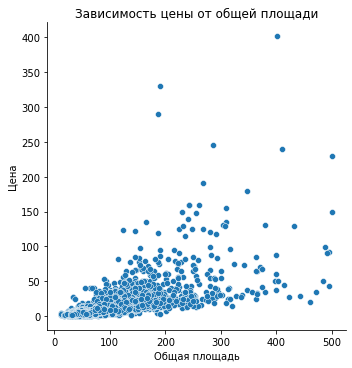

In [171]:
sns.relplot(x='total_area', y='last_price_mln', data=data)
total_area=np.linspace(0,20)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

"Нарежем" значения параметра общая площадь на равные группы.

In [172]:
pd.cut(data['total_area'],40)

0         (97.4, 109.6]
1          (36.4, 48.6]
2          (48.6, 60.8]
3        (158.4, 170.6]
4         (97.4, 109.6]
              ...      
23694    (121.8, 134.0]
23695      (48.6, 60.8]
23696      (48.6, 60.8]
23697      (73.0, 85.2]
23698      (24.2, 36.4]
Name: total_area, Length: 23536, dtype: category
Categories (40, interval[float64, right]): [(11.512, 24.2] < (24.2, 36.4] < (36.4, 48.6] < (48.6, 60.8] ... (451.2, 463.4] < (463.4, 475.6] < (475.6, 487.8] < (487.8, 500.0]]

In [173]:
np.inf>999999999

True

Сгруппируем "нарезанные" значения и построим диаграмму.

In [174]:
data['total_area_group']=pd.cut(data['total_area'],[0,35,55,75,95,115,135,np.inf])

<AxesSubplot:xlabel='total_area_group'>

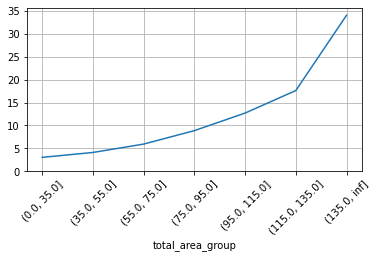

In [175]:
data.groupby(['total_area_group'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выведем таблицу со средними и медианными значениями по выделенным группам параметра жилая площадь.

In [176]:
data.groupby('total_area_group').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='total_area_group',values='last_price_mln',aggfunc=('count','mean','median'))

total_area_group,"(0.0, 35.0]","(35.0, 55.0]","(55.0, 75.0]","(75.0, 95.0]","(95.0, 115.0]","(115.0, 135.0]","(135.0, inf]"
count,3493.00000,9527.000000,5957.000000,2360.00000,1001.00000,457.000000,741.000000
mean,3.03282,4.102526,5.932065,8.86889,12.70175,17.620438,34.046209
median,3.10000,4.040000,5.600000,8.14000,11.63500,14.998000,23.000000


На графике и в таблице можно проследить рост стоимости объектов недвижимости в зависимости от общей площади. Наибольшее количество квартир 9550 в группе с 35.0-55.0 кв.м. общей площади, средняя цена - 4.0 млн.руб. Также большое количество квартир 5978 в группе с 55.0-75.0 кв.м. общей площади, средняя цена - 5.9 млн.руб.Резкий рост стоимости объектов наблюдается с квартир общей площади 115 кв.м.

**4.3.2  Зависимость цены от жилой площади.**

Строим график зависимости цены от жилой площади.

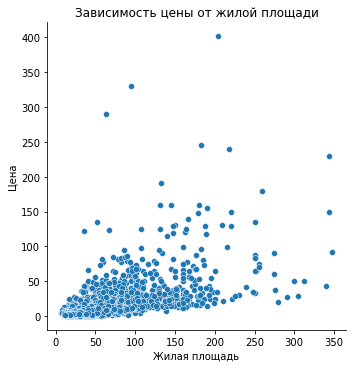

In [177]:
sns.relplot(x='living_area', y='last_price_mln', data=data)
total_area=np.linspace(0,20)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

Разделим значения параметра жилая площадь на равные группы.

In [178]:
pd.cut(data['living_area'],40)

0         (49.125, 57.65]
1         (15.025, 23.55]
2          (32.075, 40.6]
3        (108.8, 117.325]
4         (23.55, 32.075]
               ...       
23694      (66.175, 74.7]
23695      (32.075, 40.6]
23696     (23.55, 32.075]
23697     (49.125, 57.65]
23698     (6.159, 15.025]
Name: living_area, Length: 23536, dtype: category
Categories (40, interval[float64, right]): [(6.159, 15.025] < (15.025, 23.55] < (23.55, 32.075] < (32.075, 40.6] ... (313.4, 321.925] < (321.925, 330.45] < (330.45, 338.975] < (338.975, 347.5]]

Сгруппируем полученные группы и построим график зависимости цены от жилой площади по группам.

In [179]:
data['living_area_group']=pd.cut(data['living_area'],[0,15,25,35,45,55,65,np.inf])

<AxesSubplot:xlabel='living_area_group'>

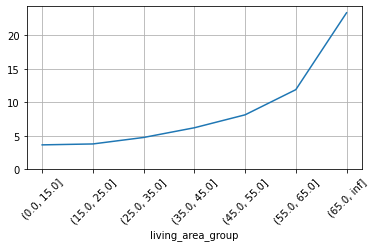

In [180]:
data.groupby(['living_area_group'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выводим средние и медианные значения зависимости цены от жилой площади по полученным группам.

In [181]:
data.groupby('living_area_group').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='living_area_group',values='last_price_mln',aggfunc=('count','mean','median'))

living_area_group,"(0.0, 15.0]","(15.0, 25.0]","(25.0, 35.0]","(35.0, 45.0]","(45.0, 55.0]","(55.0, 65.0]","(65.0, inf]"
count,1013.000000,7006.00000,6552.000000,4168.000000,2340.000000,980.000000,1477.000000
mean,3.636109,3.77254,4.738567,6.182082,8.109395,11.856565,23.302854
median,3.400000,3.59000,4.400000,5.500000,7.100000,9.508000,15.600000


На графике и в полученной таблице прослеживается рост цены недвижимости при увеличении жилой площади. Стремительный рост цены наблюдается с объектов жилой площадью более 45.0-55.0 кв.м.

**4.3.3  Зависимость цены от площади кухни.**

Выводим график зависимости цены от стоимости кухни.

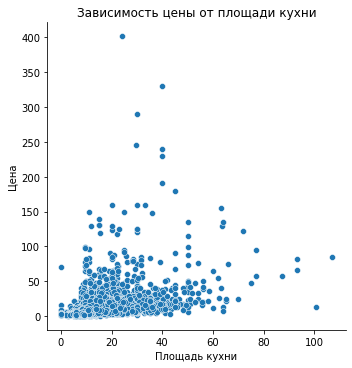

In [182]:
sns.relplot(x='kitchen_area', y='last_price_mln', data=data)
total_area=np.linspace(0,20)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

Разделим данные параметра площадь кухни на равные группы.

In [183]:
pd.cut(data['kitchen_area'],10)

0          (21.4, 32.1]
1          (10.7, 21.4]
2        (-0.107, 10.7]
3        (-0.107, 10.7]
4          (32.1, 42.8]
              ...      
23694      (10.7, 21.4]
23695    (-0.107, 10.7]
23696    (-0.107, 10.7]
23697      (21.4, 32.1]
23698    (-0.107, 10.7]
Name: kitchen_area, Length: 23536, dtype: category
Categories (10, interval[float64, right]): [(-0.107, 10.7] < (10.7, 21.4] < (21.4, 32.1] < (32.1, 42.8] ... (64.2, 74.9] < (74.9, 85.6] < (85.6, 96.3] < (96.3, 107.0]]

Сгруппируем значения по полученным группа и построим график.

In [184]:
data['kitchen_area_group']=pd.cut(data['kitchen_area'],[0,11,22,33,44,55,np.inf])

<AxesSubplot:xlabel='kitchen_area_group'>

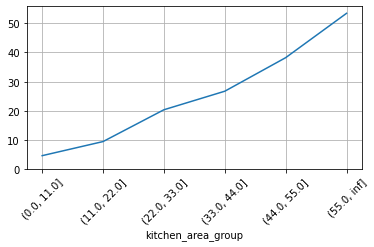

In [185]:
data.groupby(['kitchen_area_group'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выведем таблицу со средними и медианными значениями зависимости площади кухни от общей площади квартиры по каждой группе.

In [186]:
data.groupby('kitchen_area_group').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='kitchen_area_group',values='last_price_mln',aggfunc=('count','mean','median'))

kitchen_area_group,"(0.0, 11.0]","(11.0, 22.0]","(22.0, 33.0]","(33.0, 44.0]","(44.0, 55.0]","(55.0, inf]"
count,16947.00000,5583.000000,550.000000,168.00000,54.000000,31.000000
mean,4.65776,9.480681,20.362638,26.70472,38.177611,53.351097
median,4.13700,7.200000,13.000000,18.12500,24.245000,41.900000


С увеличением площади кухни наблюдается рост цены на квартиру. Прослеживается общая тенденция: с увеличением общей площади квартиры наблюдается увеличение жилой площади и площади кухни. Цена на квартиру растет с увеличением общей, жилой площади и площади кухни.

**4.3.4 Зависимость цены от количества комнат.**

Построим графики зависимости цены от количества комнат.

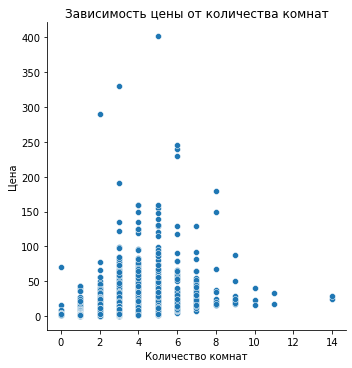

In [187]:
sns.relplot(x='rooms', y='last_price_mln', data=data)
total_area=np.linspace(0,20)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

<AxesSubplot:xlabel='rooms'>

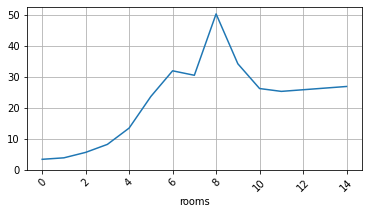

In [188]:
data.groupby(['rooms'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выводим таблицу со средними и медианными значениями зависимости цены от количества комнат.

In [189]:
data.groupby('rooms').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='rooms',values='last_price_mln',aggfunc=('count','mean','median'))

rooms,0,1,2,3,4,5,6,7,8,9,10,11,14
count,192.000000,7997.000000,7890.00000,5777.000000,1171.000000,324.000000,104.000000,54.000000,12.000000,8.000000,3.000000,2.00,2.0000
mean,3.353234,3.832262,5.58831,8.165376,13.424167,23.612497,31.880038,30.439519,50.224167,34.152375,26.166667,25.25,26.8295
median,2.715000,3.600000,4.75300,6.200000,9.000000,14.000000,19.000000,23.500000,23.095000,23.750000,23.000000,25.25,26.8295


Наблюдается рост цены объектов недвижимости в зависимости от количества комнат. Наибольший рост цены - на квартиры с большим количеством комнат - 4 и более, но таких квартир не много.

**4.3.5 Зависимость цены от этажа, на котором расположена квартира.**

Построим графики зависимости цены квартиры от этажа, на котором квартира расположена. Рассматриваем группы "первый", "последний", "другой".

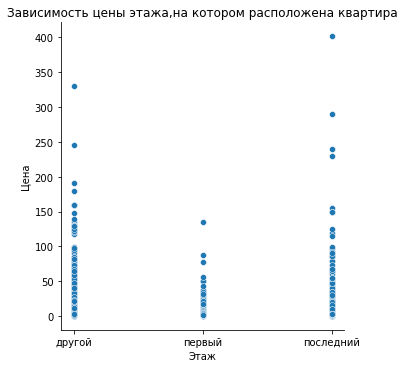

In [190]:
sns.relplot(x='floor_category', y='last_price_mln', data=data)
total_area=np.linspace(0,20)
plt.title('Зависимость цены этажа,на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

<AxesSubplot:xlabel='floor_category'>

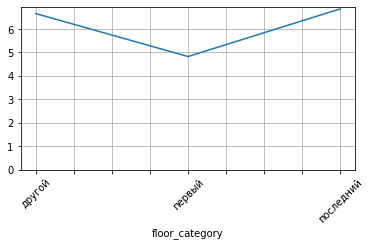

In [191]:
data.groupby(['floor_category'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Создаем таблицу со средними и медианными значениями зависимости цены от этажности.

In [192]:
data.groupby('floor_category').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='floor_category',values='last_price_mln',aggfunc=('count','mean','median'))

floor_category,другой,первый,последний
count,17311.000000,2880.000000,3345.00000
mean,6.651364,4.820859,6.85073
median,4.840000,3.900000,4.30000


Цена квартиры, расположенной на 1-м этаже, ниже цен на квартиры других категорий.

**4.3.6 Зависимость цены от даты публикации объявления (день недели, месяц, год)**

Строим график зависимости стоимости квартиры от дня недели даты публикации объявления.

<AxesSubplot:xlabel='weekday'>

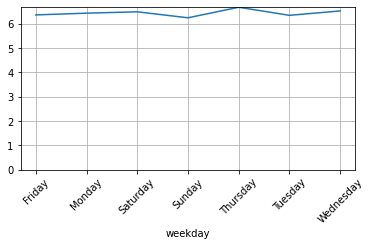

In [193]:
data.groupby(['weekday'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выводим таблицу со средними и медианными значениями цены квартиры в зависимости от дня недели даты публикации.

In [194]:
data.groupby('weekday').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='weekday',values='last_price_mln',aggfunc=('count','mean','median'))

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,3977.000000,3592.000000,1913.000000,1682.000000,4271.000000,4158.000000,3943.000000
mean,6.361343,6.433072,6.488876,6.243207,6.676012,6.343865,6.525373
median,4.550000,4.650000,4.550000,4.540000,4.650000,4.704500,4.700000


Цена квартиры не зависит от дня недели публикации объявления.

Строим график зависимости цены квартиры от месяца даты публикации объявления.

<AxesSubplot:xlabel='month'>

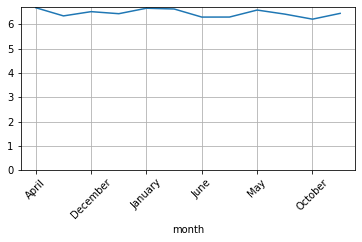

In [195]:
data.groupby(['month'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

In [196]:
data.groupby('month').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='month',values='last_price_mln',aggfunc=('count','mean','median'))

month,April,August,December,February,January,July,June,March,May,November,October,September
count,2354.000000,1736.000000,1635.000000,2633.00000,1486.000000,1684.000000,1745.000000,2570.000000,1260.000000,2358.000000,2105.000000,1970.000000
mean,6.688039,6.351089,6.526454,6.44189,6.667087,6.635818,6.302605,6.303851,6.591913,6.424616,6.217115,6.455389
median,4.800000,4.570000,4.690000,4.65000,4.600000,4.650000,4.400000,4.650000,4.500000,4.700000,4.570000,4.700000


Цена квартиры не зависит от месяца даты публикации объявления.

Построим график зависимости цены от года даты публикации объявления.

<AxesSubplot:xlabel='year'>

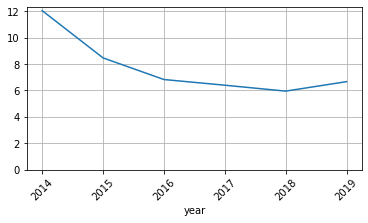

In [197]:
data.groupby(['year'])['last_price_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Выведем среднии и медианные значения зависимости цены от года даты публикации объявления.

In [198]:
data.groupby('year').agg({'last_price_mln': ['count','mean','median']})
data.pivot_table(columns='year',values='last_price_mln',aggfunc=('count','mean','median'))

year,2014,2015,2016,2017,2018,2019
count,136.000000,1162.000000,2744.000000,8153.000000,8475.000000,2866.000000
mean,12.046603,8.467908,6.829565,6.399078,5.951522,6.668642
median,7.640000,5.300000,4.515000,4.500000,4.550000,5.050000


Самые высокие цены объектов недвижимости наблюдаются в 2014 году со снижением цен в 2015, дальнейшим снижением и стабилизацией цен в 2016-2019 годах.

**4.4 Посчитаем среднюю цену одного квадратного метра и определим 10 населенных пунктов с наибольшим числом объявлений.**

Считаем цену за 1 кв.м.

In [199]:
data['sqm_price_mean']=round(data['last_price']/data['total_area'],3)

Выводим таблицу с 10 населенными пунктами с наибольшим каличеством объявлений.

In [200]:
sqm_price_median=data.pivot_table(index='locality_name', values='sqm_price_mean',aggfunc=['count','median','mean'])
sqm_price_median.columns=['count','median','mean']
sqm_price_median.sort_values('count',ascending=False).head(10)
                    

,count,median,mean
locality_name,,,
Санкт-Петербург,15626,104761.9050,114653.497061
посёлок Мурино,551,86042.6390,85601.120808
посёлок Шушары,439,76829.2680,78551.344574
Всеволожск,398,65789.4740,68654.474000
Пушкин,369,100000.0000,103125.819274
Колпино,338,74723.7485,75424.579098
посёлок Парголово,327,91642.8570,90175.913431
Гатчина,307,67796.6100,68746.146808
деревня Кудрово,299,91860.4650,92473.547572


Выведем в таблицу населенные пункты с самой высокой стоимостью за кв.м.

In [201]:
sqm_price_median=data.pivot_table(index='locality_name', values='sqm_price_mean',aggfunc=['count','median','mean'])
sqm_price_median.columns=['count','median','mean']
sqm_price_median.sort_values('median',ascending=False).head()

,count,median,mean
locality_name,,,
Санкт-Петербург,15626,104761.9050,114653.497061
Зеленогорск,24,101666.6665,115122.799167
Кудрово,171,100000.0000,100134.543731
Пушкин,369,100000.0000,103125.819274
Сестрорецк,183,99678.4570,101757.616874


Выводим в таблицу населенные пункты с самой низкой стоимостью за кв.м.

In [202]:
sqm_price_median=data.pivot_table(index='locality_name', values='sqm_price_mean',aggfunc=['count','median','mean'])
sqm_price_median.columns=['count','median','mean']
sqm_price_median.sort_values('median').head()

,count,median,mean
locality_name,,,
деревня Старополье,3,11000.0000,11206.221333
посёлок станции Свирь,2,11481.4815,11481.481500
деревня Вахнова Кара,1,11688.3120,11688.312000
деревня Выскатка,2,12335.4810,12335.481000
посёлок Совхозный,2,12629.1295,12629.129500


Произведен рассчет средней цены одного квадратного метра общей площади. В число 10 населенных пунктов с наибольшим числом объявлений вошли: Санкт-Петербург - с количеством объявлений 15696, посёлок Мурино	- 555, посёлок Шушары -	440, Всеволожск	- 398, Пушкин -	369, Колпино - 338,	посёлок Парголово -	327, Гатчина -	307, деревня Кудрово -	299	и Выборг -237.

Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург	с медианной стоимостью кв.м. - 104761.9050, Зеленогорск	- 101666.6665, Кудрово - 100000.0000, Пушкин - 100000.0000 и Сестрорецк	-	99678.4570.

Населенные пункты с самой низкой стоимостью квадратного метра: деревня Старополье с медианной стоимостью квадратного метра 11000.0000, посёлок станции Свирь - 11481.4815, деревня Вахнова Кара	-	11688.3120,	деревня Выскатка - 12335.4810 и	посёлок Совхозный	-	12629.1295.	

**4.5 Выделяем квартиры в Санкт-Петербурге и вычисляем среднюю цену каждого километра.**

Вычислем средние и медианные значения цены 1 кв.м. в зависимости от удачения от центра города для объектов, отнесенных к категории Санкт-Петербург для каждого километра удаления от центра города.

In [203]:
data.loc[(data['locality_name']=='Санкт-Петербург')&(data['city_centers_nearest_km']
                                                     .notna()),'city_centers_nearest_km'].apply(round)
spb_data=data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest=spb_data.pivot_table(index='city_centers_nearest_km', values=['sqm_price_mean', 'last_price'],
                                        aggfunc=('mean', 'median'))
spb_center_nearest.head(10)

last_price             sqm_price_mean             
                                 mean      median           mean       median
city_centers_nearest_km                                                      
0.0                      3.144912e+07  17900000.0  245833.530296  172619.0480
1.0                      2.120672e+07  11395000.0  177005.407677  128485.1105
2.0                      1.768407e+07  10000000.0  158046.862359  123622.0470
3.0                      1.113739e+07   8409000.0  121507.831612  108469.1120
4.0                      1.215999e+07   9200000.0  130802.146635  118055.5560
5.0                      1.382246e+07   9438000.0  139948.951787  126930.0520
6.0                      1.514635e+07   8895000.0  150474.514994  131612.0130
7.0                      1.479526e+07   7800000.0  156258.172014  127173.9130
8.0                      9.247926e+06   7400000.0  124272.423564  122599.8465
9.0                      6.968353e+06   5300500.0  113350.979322  105817.0295

Строим график зависимости цены за кв.м. от километров удаления от центра города для объектов, находящихся в Санкт-Петербургу.

<AxesSubplot:xlabel='city_centers_nearest_km'>

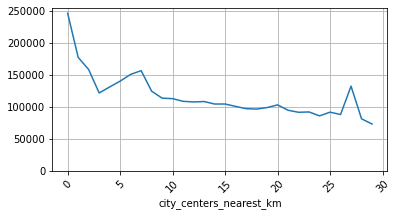

In [204]:
spb_data.groupby(['city_centers_nearest_km'])['sqm_price_mean'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

Стоимость объектов меняется в зависимости от удаления от центра города. Наиболее высокая цена 1 кв.м. наблюдается в центре города. По мере удаления от центра города цена снижается, но до 8 км держится на высоком уровне, далее снижаясь по мере удаления от центра города. Наблюдается пик цены на 26 километре от центра города. Можно предположить, что это новые комплексные застройки - современные дома с улучшенными планировками и комфортной окружающей средой.

****Выводы:****

**Изучены следующие параметров объектов:**

**1.Общая площадь:**
*Большинство квартир площадью до 80 кв.м. При площади более 80 кв.м., количество квартир уменьшается с увеличением общей площади. В выборке встречаются единичные квартиры очень большой площади более 200 кв.м. Также есть единичные квартиры мальй площади менее 20 кв.м.*


**2.Жилая площадь:**
*Самые распространенные варианты с жилой площадью от 10 до 50 кв.м. После 80 кв.м. встречаются единичные значения.Соотношение жилой площади к общей площади квартиры прослеживается примерно на одном уровне. Чем больше общая площадь квартиры, тем больше количество комнат в квартире и больше жилая площадь.*

**3.Площадь кухни:**
*Самые распространенные варианты - с площадью кухни от 5 до 15 кв.м. Квартир с кухнями площадью более 20 кв.м. очень мало, более 30 кв.м. - практически не встречаются.Доля площади кухни к общей площади квартиры уменьшается с увеличением количества комнат в квартире.*

**4.Цена объекта:**
*Самое большое количество квартир продано в ценовом сегменте от 3 до 4 млн.руб. Основная ценовая категория - от 2 до 6 млн. Чем дороже квартира, тем меньшее количество продаж. Есть небольшое количество квартир в недорогом сегменте - до 1 млн.руб.*

**5.Количество комнат:**
*Наибольшее количество квартир - одно- и двухкомнатные, немного меньше - трехкомнатных квартир. Небольшое количество квартир-студий и квартир с большим количеством комнат.*

**6.Высота потолков:**
*Наибольшее количество квартир - с высотой потолков 2-2.35 м. Большое количество квартир и с более высокими потолками 2.8-3.3 м. С еще более высокими потолками - единичные квартиры.*

**7.Этаж квартиры:**
*Наибольшее количество квартир располагается на 1-4 этажах.*

**8.Тип этажа квартиры ("первый", "последний", "другой"):**
*Количество проданных квартир зависит от категории квартиры ("первый", "последний", "другой"). Наибольшее количество объектов недвижимости относятся к категории "другой", т.е. расположены не на крайних этажах. Наименьшее количество квартир расположено на первом и последнем этажах, на первом меньше, чем на последнем.*

**9.Расстояние до центра города:**
*Наибольший пик приходится на объекты недвижимости, находящиеся на относительно небольшом расстоянии от центра города, что близко к медианному значению данного параметра -13000 м (это скорее всего окраины города, где ведется активное строительство и цены демократичнее). Количество квартир снижается с увеличением отдаленности от центра города.*

**10.Расстояние до ближайшего аэропорта:**
*Наибольшее количество квартир расположены на расстоянии 20000-40000 м от ближайшего аэропорта. На расстоянии менее 10000 м от ближайшего аэропорта расположено небольшое количество квартир, на расстоянии более 50000 м - количество квартир резко снижается.*

**11.Расстояние до ближайшего парка:**
*Параметр расстояния от ближайшего парка заполнен 8050 значениями. Основной пик из этого количества приходится приходится на квартиры, расположенные на расстоянии до 1000 м от ближайшего парка, на расстоянии более 1000 м -единичные значения. Таким образом, подтверждается сделанное ранее предположение, что данные заполнены преимущественно для имеющих парки в непосредственной близости.*

**12.День и месяц публикации объявления:**
*Наибольшее число квартир приходится на будние дни недели, где число квартир, приходящееся на каждый будний день сопоставимы. Небольшое снижение активности приходится на выходные дни - субботу и воскресенье.
Самые неактивные месяцы - май, январь и декабрь. Наибольшая активность приходится на февраль-апрель и ноябрь.*

**13.Общее количество этажей в доме:**
*Наибольшее количество квартир приходится на 5-этажные дома, можно сделать предположение, что это квартиры массовой застройки 60-х -70-х годов. Также большое количество квартир - в 10-этажных домах.*


**Изучена скорость продажи квартир:**
*Обычно продажа занимает 50-100 дней. Некоторые объекты недвижимости были проданы очень быстро, они выделены в категорию "too_fast" со значениями менее 30 дней. Есть объекты, которые были размещены на продажу долгое время, у нас они выделены в категорию "too_slow" с длительностью размещения более 170 дней. В этой категории попадаются квартиры, которые были выставлены на продажу 300-400 и более дней.*


**Изучена зависимость цены от:**

**общей площади:**
*Наибольшее количество квартир 9550 в группе с 35.0-55.0 кв.м. общей площади, средняя цена - 4.0 млн.руб. Также большое количество квартир 5978 в группе с 55.0-75.0 кв.м. общей площади, средняя цена - 5.9 млн.руб.Резкий рост стоимости объектов наблюдается с квартир общей площади 115 кв.м.*

**жилой площади:**
*Цена недвижимости растет при увеличении жилой площади. Стремительный рост цены наблюдается с объектов жилой площадью более 45.0-55.0 кв.м.

**площади кухни:**
*С увеличением площади кухни наблюдается рост цены на квартиру. Прослеживается общая тенденция: с увеличением общей площади квартиры наблюдается увеличение жилой площади и площади кухни. Цена на квартиру растет с увеличением общей, жилой площади и площади кухни.*

**количества комнат:**
*Наблюдается рост цены объектов недвижимости в зависимости от количества комнат. Наибольший рост цены - на квартиры с большим количеством комнат - 4 и более, но таких квартир не много.*

**этажа, на котором расположена квартира("первый", "последний", "другой"):**
*Цена квартиры, расположенной на 1-м этаже, ниже цен на квартиры других категорий.*

**даты размещения объявления (день недели, месяц, год):**
*Цена квартиры не зависит от дня недели публикации объявления.Цена квартиры не зависит от месяца даты публикации объявления.Самые высокие цены объектов недвижимости наблюдаются в 2014 году со снижением цен в 2015, дальнейшим снижением и стабилизацией цен в 2016-2019 годах.*

**Посчитана средняя цена на 1 кв.м. Выделены населенные пункты с наибольшим числом объявлений, с самой высокой и низкой стоимостью 1 кв.м.:**
*Произведен рассчет средней цены одного квадратного метра общей площади. В число 10 населенных пунктов с наибольшим числом объявлений вошли: Санкт-Петербург - с количеством объявлений 15696, посёлок Мурино - 555, посёлок Шушары - 440, Всеволожск - 398, Пушкин - 369, Колпино - 338, посёлок Парголово - 327, Гатчина - 307, деревня Кудрово - 299 и Выборг -237.*

*Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург с медианной стоимостью кв.м. - 104762, Зеленогорск - 101667, Кудрово - 100000, Пушкин - 100000 и Сестрорецк - 99678 руб.*

*Населенные пункты с самой низкой стоимостью квадратного метра: деревня Старополье с медианной стоимостью квадратного метра 11000.0000, посёлок станции Свирь - 11481, деревня Вахнова Кара - 11688, деревня Выскатка - 12335 и посёлок Совхозный - 12629 руб.*

**Выделены квартиры в Санкт-Петербурге и вычислена средняя цена каждого километра:**
*Стоимость объектов меняется в зависимости от удаления от центра города. Наиболее высокая цена 1 кв.м. наблюдается в центре города. По мере удаления от центра города цена снижается, но до 8 км держится на высоком уровне, далее снижаясь по мере удаления от центра города.Наблюдается пик цены на 26 километре от центра города. Можно предположить, что это новые комплексные застройки - современные дома с улучшенными планировками и комфортной окружающей средой.*

### Общий вывод

**При анализе стоимости предложенной выборки объектов недвижимости выявленены следующие параметры, влияющие на стоимость анализируемых объектов:**

**-общая площадь квартиры: Прослеживается общая тенденция- с увеличением общей площади квартиры наблюдается увеличение жилой площади и площади кухни. Наибольшее количество квартир 9550 в группе с 35.0-55.0 кв.м. общей площади, средняя цена - 4.0 млн.руб. Также большое количество квартир 5978 в группе с 55.0-75.0 кв.м. общей площади, средняя цена - 5.9 млн.руб.Резкий рост стоимости объектов наблюдается с квартир общей площади 115 кв.м. Аномальные значения на этапе предподготовки данных были удалены. Имеются отдельные выбивающиеся значения, которые на мой взгляд, могут реально существовать, но не оказывают существенного влияния на результат.**

**-расстояние до центра города: Центр города ограничен расстоянием в 8 км.Стоимость объектов меняется в зависимости от удаления от центра города. Наиболее высокая цена 1 кв.м. наблюдается в центре города. По мере удаления от центра города цена снижается, но до 8 км держится на высоком уровне, далее снижаясь по мере удаления от центра города.В ходе исследования были выделены населенные пункты с наибольшим числом объявлений (Санкт-Петербург-15696 объявлений), населенные пункты с самой высокой (Санкт-Петербург - 104762) и самой низкой стоимостью квадратного метра (деревня Старополье - 11000).На этапе предобработки данных были удалены пропущенные значения в столбце с названиями населенных пунктов, также устранены неявные дубликаты.**

**число комнат и этаж квартиры: Наблюдается рост цены объектов недвижимости в зависимости от количества комнат, т.к. данный параметр в большинстве случаев напрямую связан с увеличением общей и жилой площади. Наибольший рост цены - на квартиры с большим количеством комнат - 4 и более, но таких квартир не много.Цена квартиры, расположенной на 1-м этаже, ниже цен на квартиры других категорий.Чем ближе квартира расположена к центру города, тем тем большее влияние данные параметры оказывают на стоимость.**

**срок продажи квартиры:Обычно продажа занимает 50-100 дней. Некоторые объекты недвижимости были проданы очень быстро, они выделены в категорию "too_fast" со значениями менее 30 дней. Есть объекты, которые были размещены на продажу долгое время, у нас они выделены в категорию "too_slow" с длительностью размещения более 170 дней. В этой категории попадаются квартиры, которые были выставлены на продажу 300-400 и более дней.**